In [30]:
import numpy as np
import pandas as pd
import matplotlib as plt
from matplotlib import pyplot
%matplotlib inline

In [31]:
filepath = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod1.csv"
df = pd.read_csv(filepath)
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


In [32]:
df.dtypes

Unnamed: 0          int64
Manufacturer       object
Category            int64
Screen             object
GPU                 int64
OS                  int64
CPU_core            int64
Screen_Size_cm    float64
CPU_frequency     float64
RAM_GB              int64
Storage_GB_SSD      int64
Weight_kg         float64
Price               int64
dtype: object

In [33]:
df[['Screen_Size_cm']] = np.round(df[['Screen_Size_cm']],2)
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.62,1.8,8,256,1.91,837


,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.62,1.8,8,256,1.91,837


In [34]:
missing_data=df.isnull()
print(missing_data.head())
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

   Unnamed: 0  Manufacturer  Category  Screen    GPU     OS  CPU_core  \
0       False         False     False   False  False  False     False   
1       False         False     False   False  False  False     False   
2       False         False     False   False  False  False     False   
3       False         False     False   False  False  False     False   
4       False         False     False   False  False  False     False   

   Screen_Size_cm  CPU_frequency  RAM_GB  Storage_GB_SSD  Weight_kg  Price  
0           False          False   False           False      False  False  
1           False          False   False           False      False  False  
2           False          False   False           False      False  False  
3           False          False   False           False      False  False  
4           False          False   False           False      False  False  
Unnamed: 0
Unnamed: 0
False    238
Name: count, dtype: int64

Manufacturer
Manufacturer
False    23

## Replace with mean

In [35]:
avg_weight = df['Weight_kg'].astype(float).mean(axis=0)
print(avg_weight)

1.8622317596566522


In [36]:
df.replace({'Weight_kg': np.nan},avg_weight,inplace = True)
pd.set_option('display.max_rows', None) 
df['Weight_kg']

0      1.600000
1      2.200000
2      2.200000
3      1.220000
4      1.910000
5      2.200000
6      2.100000
7      2.200000
8      2.300000
9      2.200000
10     2.130000
11     1.910000
12     2.000000
13     1.700000
14     1.400000
15     1.860000
16     1.400000
17     2.200000
18     1.880000
19     1.630000
20     1.830000
21     1.960000
22     1.210000
23     2.650000
24     1.250000
25     2.200000
26     2.000000
27     1.910000
28     1.380000
29     1.862232
30     1.300000
31     1.580000
32     1.210000
33     1.700000
34     2.500000
35     1.600000
36     2.200000
37     1.630000
38     1.862232
39     1.750000
40     1.250000
41     1.480000
42     1.910000
43     3.000000
44     2.130000
45     2.500000
46     3.000000
47     1.050000
48     2.500000
49     1.862232
50     1.120000
51     2.500000
52     1.200000
53     1.400000
54     1.630000
55     1.600000
56     2.200000
57     1.200000
58     2.200000
59     2.000000
60     1.600000
61     1.862232
62     2

## Replace with frequent data

In [37]:
common_screen_size = df['Screen_Size_cm'].value_counts().idxmax()
df.replace({'Screen_Size_cm' : np.nan} , common_screen_size,inplace = True)
pd.set_option('display.max_rows', None) 
df['Screen_Size_cm']

0      35.56
1      39.62
2      39.62
3      33.78
4      39.62
5      39.62
6      39.62
7      38.10
8      39.62
9      38.10
10     39.62
11     39.62
12     39.62
13     35.56
14     35.56
15     39.62
16     33.02
17     39.62
18     38.10
19     35.56
20     38.10
21     39.62
22     33.02
23     39.62
24     35.56
25     39.62
26     39.62
27     39.62
28     33.02
29     35.56
30     35.56
31     35.56
32     33.02
33     39.62
34     43.94
35     35.56
36     39.62
37     35.56
38     33.02
39     35.56
40     35.56
41     35.56
42     39.62
43     43.18
44     39.62
45     38.10
46     43.18
47     33.02
48     43.94
49     33.78
50     33.02
51     43.94
52     33.78
53     33.02
54     35.56
55     35.56
56     39.62
57     33.78
58     39.62
59     39.62
60     35.56
61     39.62
62     38.10
63     39.62
64     43.94
65     43.18
66     33.78
67     39.62
68     39.62
69     38.10
70     39.62
71     38.10
72     38.10
73     39.62
74     39.62
75     39.62
76     39.62

## Change data types

In [38]:
df[["Weight_kg","Screen_Size_cm"]] = df[["Weight_kg","Screen_Size_cm"]].astype("float")
df.dtypes

Unnamed: 0          int64
Manufacturer       object
Category            int64
Screen             object
GPU                 int64
OS                  int64
CPU_core            int64
Screen_Size_cm    float64
CPU_frequency     float64
RAM_GB              int64
Storage_GB_SSD      int64
Weight_kg         float64
Price               int64
dtype: object

## Data Standardization

In [39]:
df.columns

Index(['Unnamed: 0', 'Manufacturer', 'Category', 'Screen', 'GPU', 'OS',
       'CPU_core', 'Screen_Size_cm', 'CPU_frequency', 'RAM_GB',
       'Storage_GB_SSD', 'Weight_kg', 'Price'],
      dtype='object')

In [40]:
df.head()


,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.62,1.8,8,256,1.91,837


In [13]:
# Drop the last column
#df = df.iloc[:, :-1]

In [41]:
df.rename(columns={"Screen_Size_inch": "Screen_Size_cm"}, inplace=True)

In [42]:
print(df.columns)

Index(['Unnamed: 0', 'Manufacturer', 'Category', 'Screen', 'GPU', 'OS',
       'CPU_core', 'Screen_Size_cm', 'CPU_frequency', 'RAM_GB',
       'Storage_GB_SSD', 'Weight_kg', 'Price'],
      dtype='object')


In [43]:
df["Screen_Size_inch"] = df["Screen_Size_cm"] / 2.54

In [44]:
df["Weight_kg"] = df["Weight_kg"]*2.205
df.rename(columns={'Weight_kg':'Weight_pounds'}, inplace=True)

## Data Normalization

In [45]:
df['CPU_frequency'] = df['CPU_frequency']/df['CPU_frequency'].max()
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Screen_Size_inch
0,0,Acer,4,IPS Panel,2,1,5,35.56,0.551724,8,256,3.52800,978,14.000000
1,1,Dell,3,Full HD,1,1,3,39.62,0.689655,4,256,4.85100,634,15.598425
2,2,Dell,3,Full HD,1,1,7,39.62,0.931034,8,256,4.85100,946,15.598425
3,3,Dell,4,IPS Panel,2,1,5,33.78,0.551724,8,128,2.69010,1244,13.299213
4,4,HP,4,Full HD,2,1,7,39.62,0.620690,8,256,4.21155,837,15.598425


In [46]:
bins = np.linspace(min(df["Price"]), max(df["Price"]), 4)
group_names = ['Low', 'Medium', 'High']
df['Price-binned'] = pd.cut(df['Price'], bins, labels=group_names, include_lowest=True )


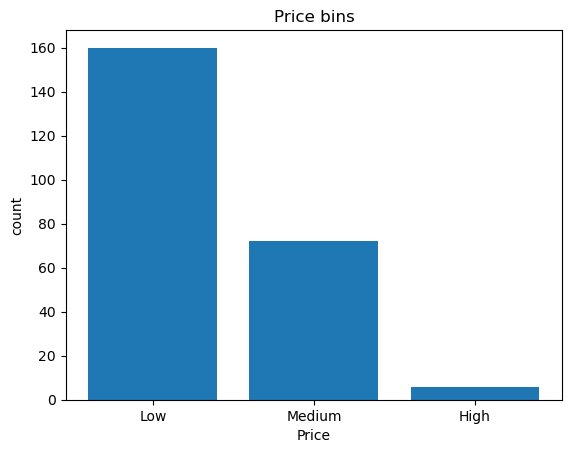

In [47]:
import matplotlib.pyplot as plt

# Now use the bar function from pyplot
plt.bar(group_names, df["Price-binned"].value_counts())
plt.xlabel("Price")
plt.ylabel("count")
plt.title("Price bins")

# Display the plot
plt.show()

In [48]:
dummy_variable_1 = pd.get_dummies(df["Screen"])
dummy_variable_1.rename(columns={'IPS Panel':'Screen-IPS_panel', 'Full HD':'Screen-Full_HD'}, inplace=True)
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "Screen" from "df"
df.drop("Screen", axis = 1, inplace=True)

In [29]:
print(df.head())

   Unnamed: 0 Manufacturer  Category  GPU  OS  CPU_core  Screen_Size_cm  \
0           0         Acer         4    2   1         5          35.560   
1           1         Dell         3    1   1         3          39.624   
2           2         Dell         3    1   1         7          39.624   
3           3         Dell         4    2   1         5          33.782   
4           4           HP         4    2   1         7          39.624   

   CPU_frequency  RAM_GB  Storage_GB_SSD  Weight_kg  Price Price-binned  \
0            1.6       8             256       1.60    978          Low   
1            2.0       4             256       2.20    634          Low   
2            2.7       8             256       2.20    946          Low   
3            1.6       8             128       1.22   1244          Low   
4            1.8       8             256       1.91    837          Low   

   Screen-Full_HD  Screen-IPS_panel  
0           False              True  
1            True     